<a href="https://colab.research.google.com/github/manjunath1005/Data_Analysis/blob/main/Bengaluru_House_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Bengaluru_House_Data.csv'

In [ ]:
df=pd.read_csv(path)

Assignment: Real Estate Market Insights

**Task 1** — Load & Inspect the Dataset

1.	Load the dataset  into your notebook.

2.	Display the first 5 and last 5 rows of the dataset.

3.	Print dataset shape (rows, columns).

4.	Print dataset information using .info().

5.	Identify basic data types of all columns.



In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


**Task 2** — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after cleaning

In [ ]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
sample=df

In [ ]:
sample.drop('society',axis=1,inplace=True)

In [ ]:
sample.shape

(13320, 8)

In [ ]:
sample['bath']=sample['bath'].fillna(sample['bath'].median())
sample['balcony']=sample['balcony'].fillna(0)


In [ ]:
# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

sample['total_sqft']=sample['total_sqft'].apply(convert_sqft)
sample.dropna(subset=['total_sqft'],inplace=True)

In [ ]:
sample.drop_duplicates(inplace=True)

In [ ]:
sample

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [ ]:
sample.reset_index(drop=True,inplace=True)

In [ ]:
sample

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
12701,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00
12702,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
12703,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,0.0,400.00
12704,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00


In [ ]:
print(sample['location'].unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [ ]:
sample.groupby('location')['price'].agg('mean').sort_values(ascending=False)

,price
location,
Cubbon Road,1900.000000
Ashok Nagar,1486.000000
Defence Colony,1167.714286
Yemlur,1093.388889
Church Street,1068.000000
...,...
Celebrity Paradise Layout,19.245000
BAGUR,17.000000
Makali,16.000000


In [ ]:
sample.groupby('location')['price'].agg('mean').sort_values(ascending=False).head(1)

,price
location,
Cubbon Road,1900.0


In [ ]:
sample[['total_sqft','bath','price']].corr()

,total_sqft,bath,price
total_sqft,1.000000,0.385367,0.573858
bath,0.385367,1.000000,0.450564
price,0.573858,0.450564,1.000000


**Task 4** — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

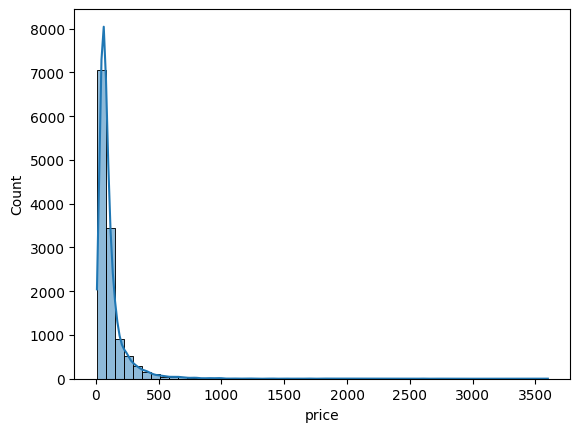

In [ ]:
sns.histplot(sample['price'],kde=True,bins=50)
plt.show()

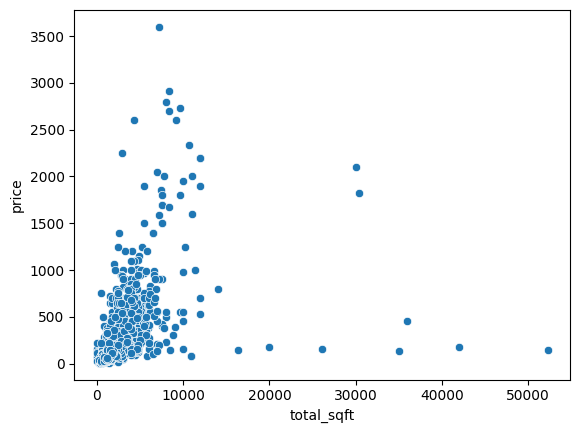

In [ ]:
sns.scatterplot(x='total_sqft',y='price',data=sample)
plt.show()

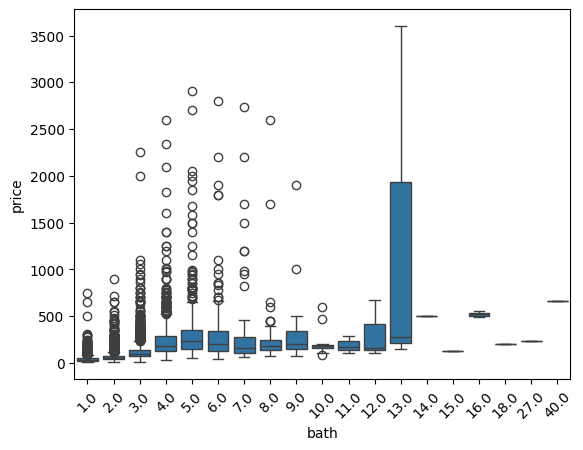

In [ ]:
sns.boxplot(x='bath', y='price', data=sample)
plt.xticks(rotation=45)
plt.show()

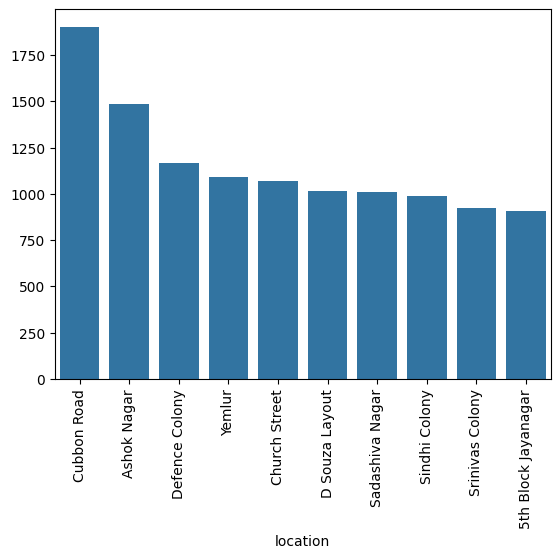

In [ ]:
top_10_locations = sample.groupby('location')['price'].agg('mean').sort_values(ascending=False).head(10)
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.xticks(rotation=90)
plt.show()

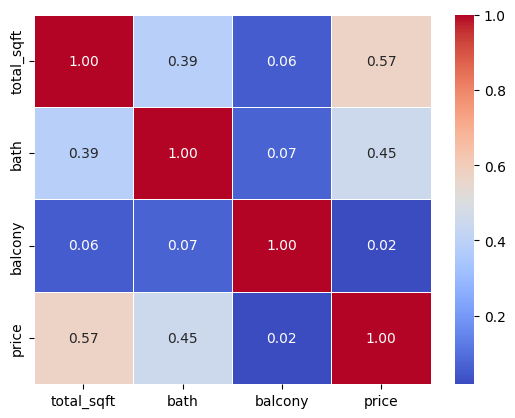

In [ ]:
numeric_features = ['total_sqft', 'bath', 'balcony', 'price']
correlation_matrix = sample[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

**Saving the File into Drive**

In [ ]:
drive_path='/content/drive/MyDrive/Colab Notebooks/Cleaned_Bengaluru_House_data.csv'
sample.to_csv(drive_path, index=False)